In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('[info]necessary libraries imported successfully...')
data = pd.read_csv('fraudTest.csv')
print('[info]data loaded successfully...')
data.head(3)

[info]necessary libraries imported successfully...
[info]data loaded successfully...


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [2]:
data.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time'],inplace=True)
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'],format='mixed')
data['hour'] = data['trans_date_trans_time'].dt.hour
data['day'] = data['trans_date_trans_time'].dt.day_name()
data['month'] = data['trans_date_trans_time'].dt.month
data['merchant'] = data['merchant'].apply(lambda x : x.replace('fraud_',''))
data[['merchant']].head()
data['gender'].value_counts()
gender_text_to_num = {'M':1,'F':0}
data['gender'] = data['gender'].map(gender_text_to_num)
data['category'].unique()
category_text_to_num = {'personal_care':1, 'health_fitness':2, 'misc_pos':3, 'travel':4,
       'kids_pets':5, 'shopping_pos':6, 'food_dining':7, 'home':8,
       'entertainment':9, 'shopping_net':10, 'misc_net':11, 'grocery_pos':12,
       'gas_transport':13, 'grocery_net':14}
data['category'] = data['category'].map(category_text_to_num)
data['dob'] = pd.to_datetime(data['dob'],format='mixed')
data['age'] = (data['trans_date_trans_time'].dt.year - data['dob'].dt.year).astype(int)
data.drop(columns='dob',inplace=True)

In [3]:
data = data.sample(frac=1)

x = data[[ 'cc_num', 'category', 'amt',
       'gender', 'zip', 'lat', 'long', 'city_pop','merch_lat',
       'merch_long', 'hour', 'month', 'age']].values
y = data['is_fraud'].values


print('data segregation Completed...')
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)
print('[info]Data Splitting complete')
data = data.sample(frac=1)

x = data[[ 'cc_num', 'category', 'amt',
       'gender', 'zip', 'lat', 'long', 'city_pop','merch_lat',
       'merch_long', 'hour', 'month', 'age']].values
y = data['is_fraud'].values


from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import accuracy_score
print('accuracy score',accuracy_score(y_test,y_pred))
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print('[info]knn model training complete')

data segregation Completed...
[info]Data Splitting complete


C:\Users\HP\anaconda3\envs\main\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy score 0.9960771611602965
[info]knn model training complete


In [7]:
knn_pred = knn.predict(x_test)
from sklearn.metrics import accuracy_score,precision_score

print('Model Parameters :\n\n')
print('Accuracy:',accuracy_score(y_test,knn_pred))
print('Precision:',precision_score(y_test,knn_pred))

Model Parameters :


Accuracy: 0.9966349960411718
Precision: 0.6054421768707483


In [24]:
#Let's apply SMOTE over sampling to make balance between fraud and non-fraud data and see if there is a significant different
#Between the accuracies or not
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train,y_train = smote.fit_resample(x_train,y_train)

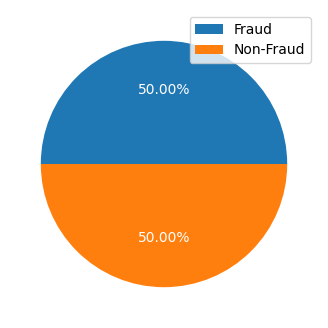

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_train is a NumPy array
unique, counts = np.unique(y_train, return_counts=True)

labels = ['Fraud', 'Non-Fraud']  # Custom labels for the pie chart sections

plt.figure(figsize=(4, 4))
plt.pie(counts, labels=labels, autopct='%.2f%%', textprops={'color': 'white'})
plt.legend()
plt.show()


* **Recall (Sensitivity):**
    * High Recall is crucial in fraud detection to minimize the number of false negatives (missed fraud cases).
    * A higher Recall indicates better sensitivity to detecting fraudulent transactions.
* **Precision:**
    * Precision is important to minimize false positives.
    * In fraud detection, a false positive might lead to inconveniencing legitimate customers.
    * Balancing precision and recall is essential.
* **F1-Score:**
    * F1-Score provides a balance between precision and recall.
    * A higher F1-Score indicates a better balance between minimizing false positives and false negatives.
* **Accuracy:**
    * While high accuracy is generally desirable, in imbalanced datasets (where fraud cases are rare), it might not bethe         * most informative metric.
    * A model could achieve high accuracy by predicting the majority class.
